## EDA on Aggregated Datasets
### * new EDA with fully aggregated data

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# defining stylesheet for all figures in notebook
plt.style.use('gstyle.mplstyle')
 
# to view all columns and names 
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [7]:
path = '../processed_data/all_processed.csv'
df = pd.read_csv(path)

df.head()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,ces_per_range,year,census tract,county,drinking water,drinking water pctl,tox. release,tox. release pctl,pollution burden pctl,unemployment,unemployment pctl,pop. char. pctl,city,latitude,longitude,ces_per,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,388.7,37.64,195.0,97.58,301.0,93.43,4.825,84.99,0,0.00,12.0,84.91,73.4,7.3,132.40,98.95,9.10,95.94,47.6,94.22,16.9,79.82,70.6,96.91,90.4,9.0,66.30,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,710.3,52.05,104.0,92.39,202.0,88.83,10.100,94.64,0,0.00,20.0,95.69,76.9,7.7,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,82.5,8.2,63.44,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,1352.2,72.67,96.0,91.62,325.0,94.11,9.600,94.22,6,63.87,5.0,53.97,73.5,7.4,73.30,90.71,6.95,60.92,47.9,94.40,23.7,89.37,68.6,96.23,83.8,8.4,61.60,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,1070.1,65.38,56.0,82.80,73.0,65.47,1.275,48.13,0,0.00,2.0,28.97,66.4,6.6,93.50,95.32,8.40,91.26,55.4,97.38,22.4,87.97,73.5,97.72,90.1,9.0,59.83,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,923.7,59.97,415.0,99.83,178.0,86.73,58.775,100.00,7,71.67,34.0,99.22,71.9,7.2,57.20,80.80,7.34,72.00,69.6,99.70,37.9,97.69,90.5,99.88,82.2,8.2,59.08,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# creating dfs for each year from full set
df1 = df[df['year'] == 2013]
df2 = df[df['year'] == 2014]
df3 = df[df['year'] == 2018]
df4 = df[df['year'] == 2021]

# double checking shape 
df1.shape, df2.shape, df3.shape, df4.shape

((1769, 57), (8035, 57), (8035, 57), (8035, 57))

In [9]:
# checking number of unique ZIP CODES
df1['zip'].nunique(), df2['zip'].nunique(), df3['zip'].nunique(), df4['zip'].nunique()

(1769, 1355, 1355, 1355)

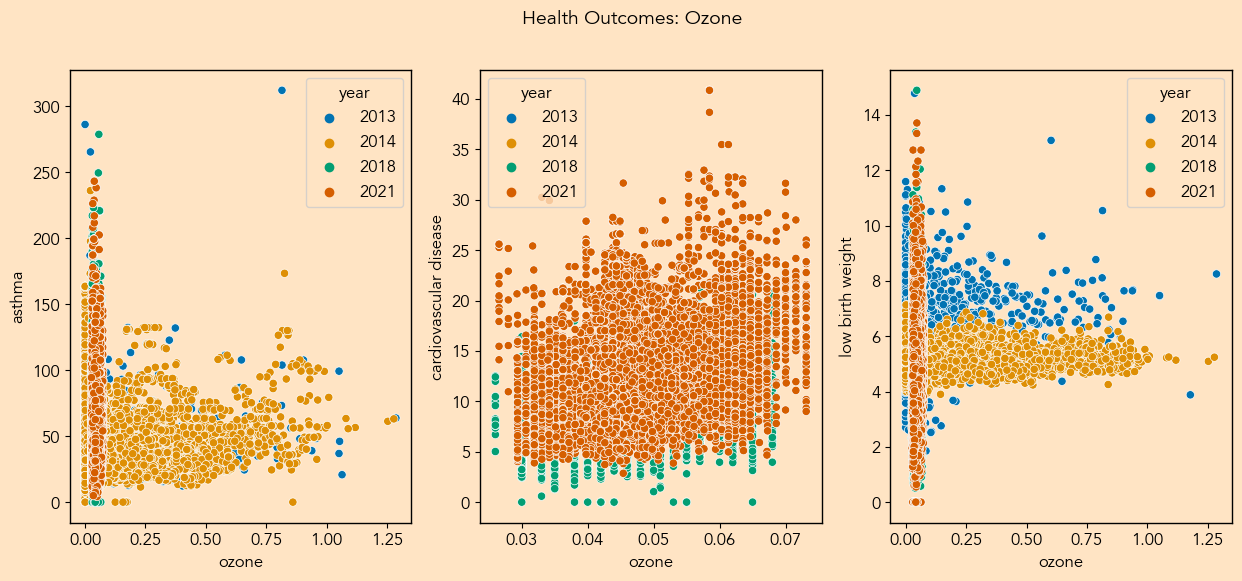

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Ozone')

x = 'ozone'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## * Reporting for `OZONE` changed between 2 and 3: 
> 
> * 1 2007 - 2009 Annual Mean Concentration PM 2.5 (average of quarterly mean)
>   * estimated values for each `ZIP `code
> * 2 2009 - 2011 Amount of daily maximum 8hr over 8hr-standard (0.070ppm)
>   * estimated values for entire `census tract`
>   * ordinary kriging geostatistical method used - only for tracts within 50km of a monitor
> * 3 2012 - 2014 Mean of summer months (May - Oct) of daily maximum, 8hr ozone concentration, ppm
>   * estimated for "center of each `census tract`"
>   * using inverse distance weighting - only for tracts within 50km of a monitor
> * 4 2017 - 2019 Mean of summer months (May - Oct) of daily maximm, 8hr ozone concentration, ppm
>   * estimated for "center of each `census tract`" - only for tracts within 50km of a monitor
>   * ordinary `kirging` spatial interpolatin method used to estimate
>
> <br>

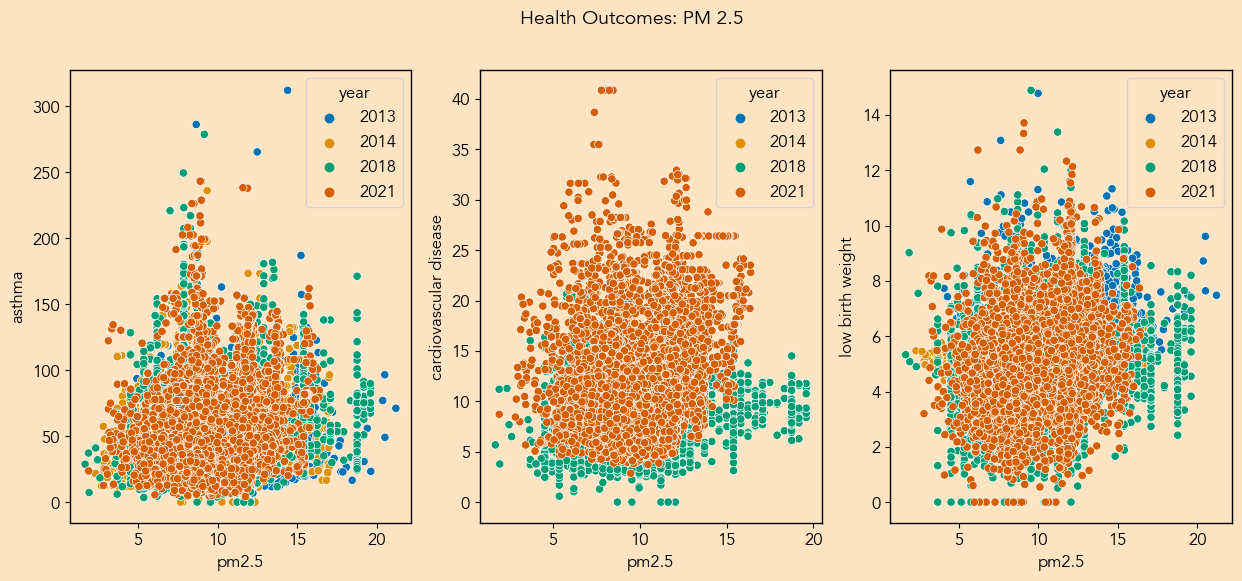

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: PM 2.5')

x = 'pm2.5'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## * `birthweight` for `ES2` scaled x100 
> ## * all values are per 10k population, so are normalized for increase in population

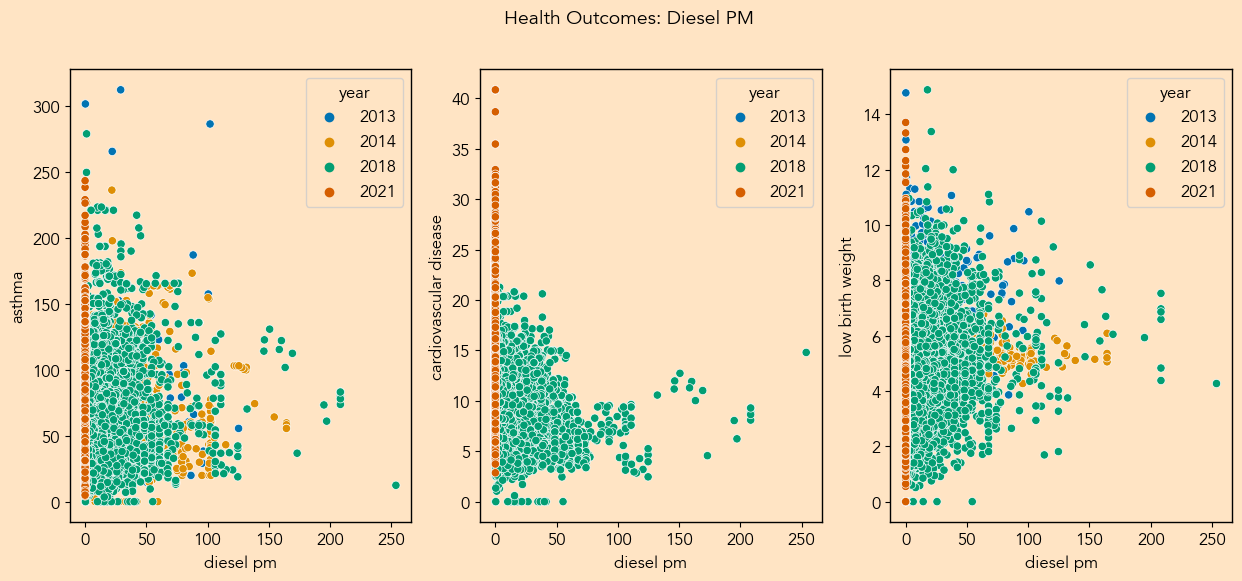

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Diesel PM ')

x = 'diesel pm'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## `diesel pm` reporting changed in 2021
> 
> * For all, 'spatial distripution of gridded diesle PM emission from on-road and non-road soruces for a July (summer) day in `year`, $\frac{kg}{day}$
> 2021(2016 data) is in $\frac{ton}{year}$
> * convert years to days, scale: $ \frac{ton}{year}/365 $

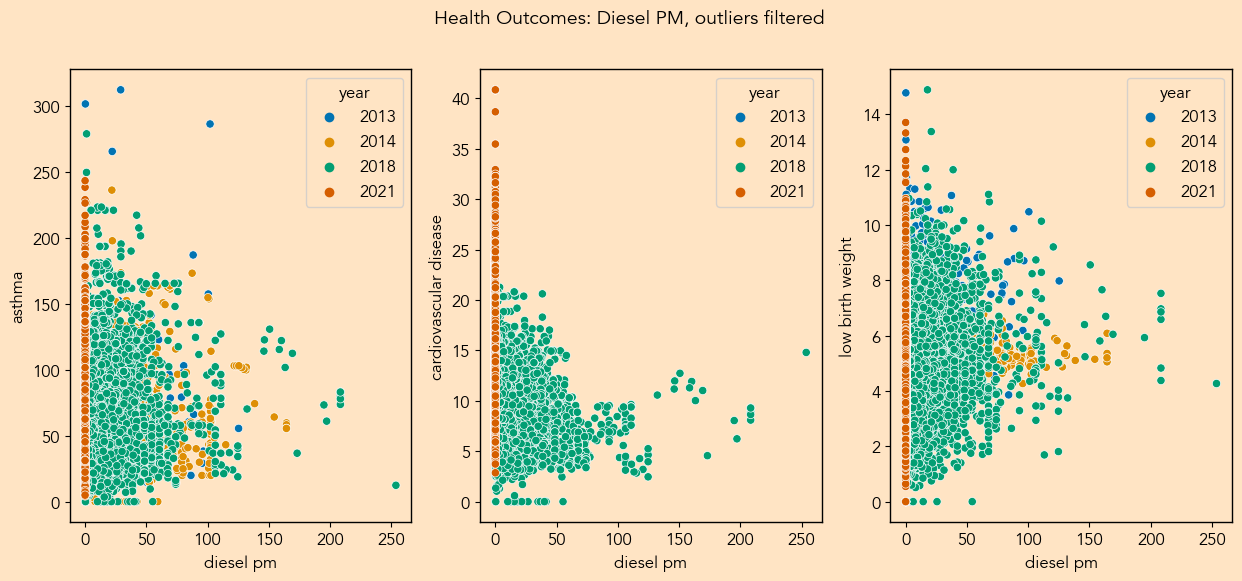

In [13]:
# dropping some of  these `diesel' outliers helps

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Diesel PM, outliers filtered ')

x = 'diesel pm'

dfd = df[df[x] < 400]

y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'

sns.scatterplot(data = dfd, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = dfd, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = dfd, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

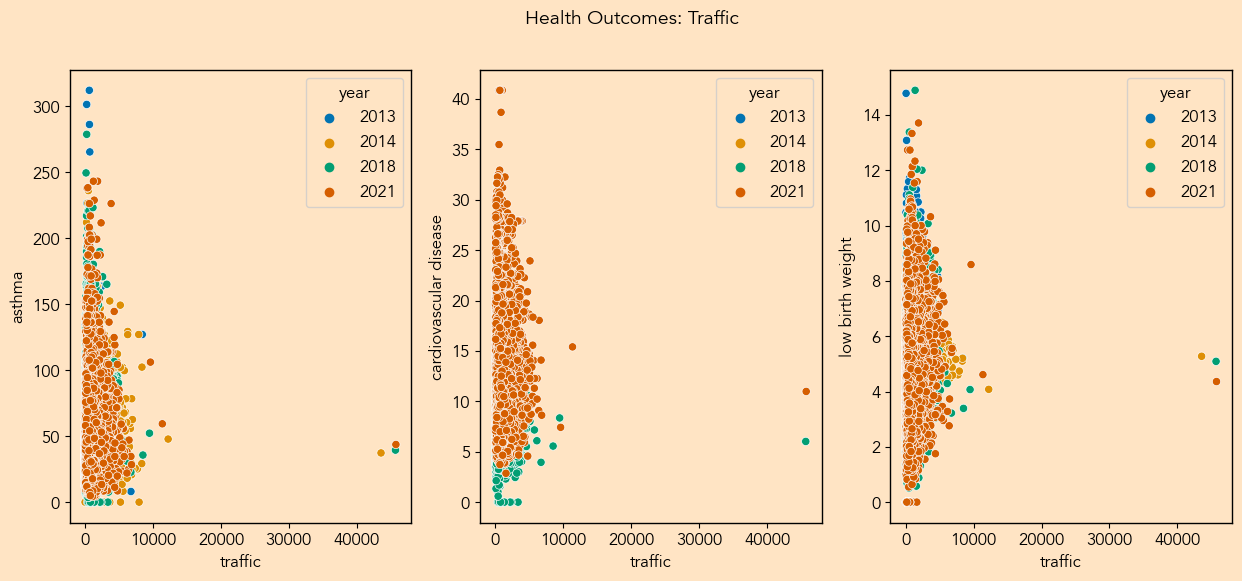

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Traffic')

x = 'traffic'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

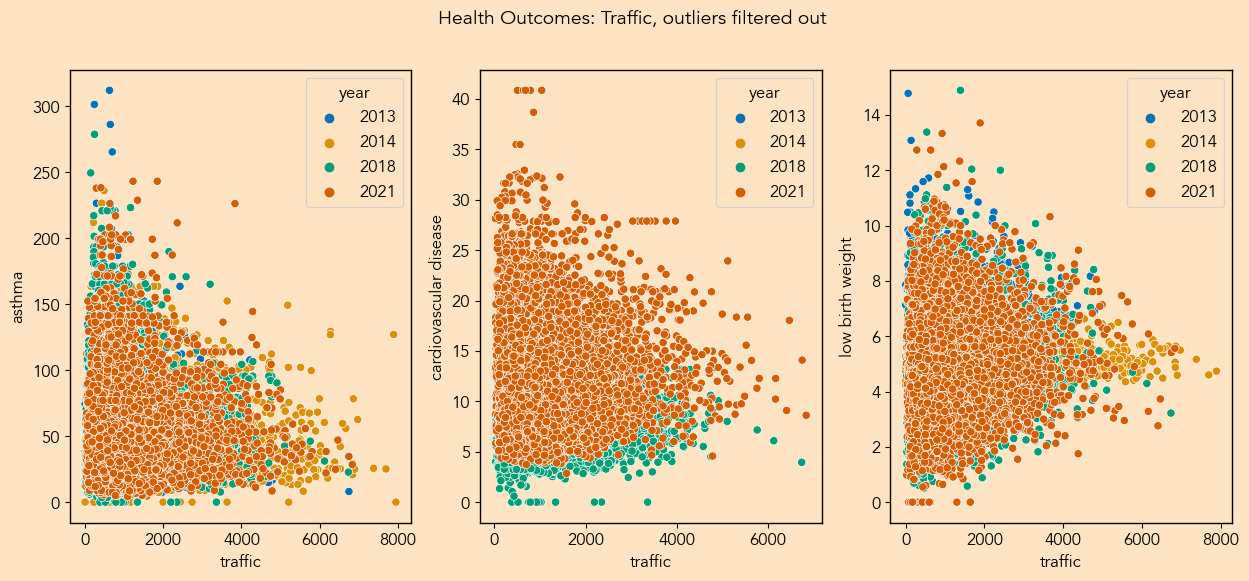

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Traffic, outliers filtered out')
dft = df[df['traffic'] < 8000]
x = 'traffic'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'

sns.scatterplot(data = dft, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = dft, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = dft, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

## filtering `traffic` outliers 

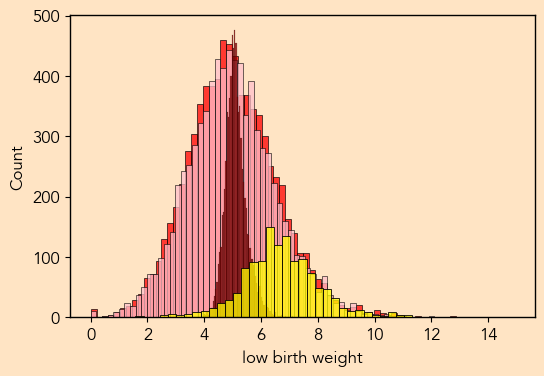

In [16]:
# data from d2 has been appropriately scaled

sns.histplot(data = df4, 
        x = df4['low birth weight'], 
        color = 'red',
        );
sns.histplot(data = df3, 
        x = df3['low birth weight'], 
        color = 'pink',
        );
sns.histplot(data = df2, 
        x = df2['low birth weight'], 
        color = 'maroon',
        );
sns.histplot(data = df1, 
        x = df1['low birth weight'], 
        color = 'yellow',
        );


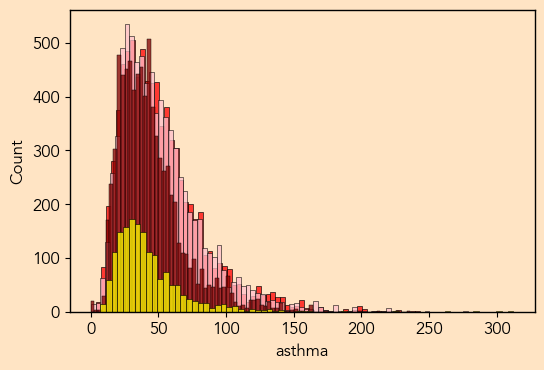

In [17]:
x = 'asthma'

sns.histplot(data = df4, 
        x = x, 
        color = 'red',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );
sns.histplot(data = df2, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'yellow',
        );

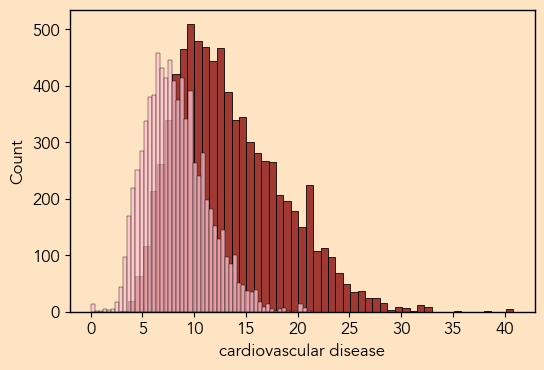

In [18]:
x = 'cardiovascular disease'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );

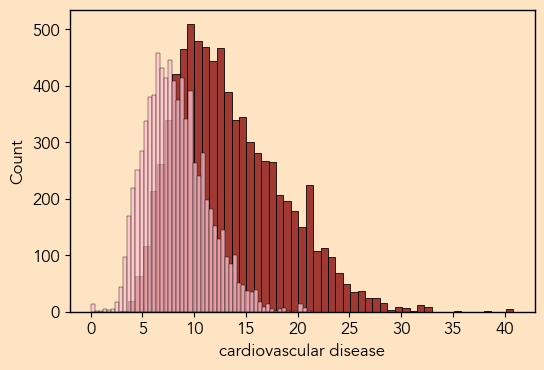

In [19]:
x = 'cardiovascular disease'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );